Transactions Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76

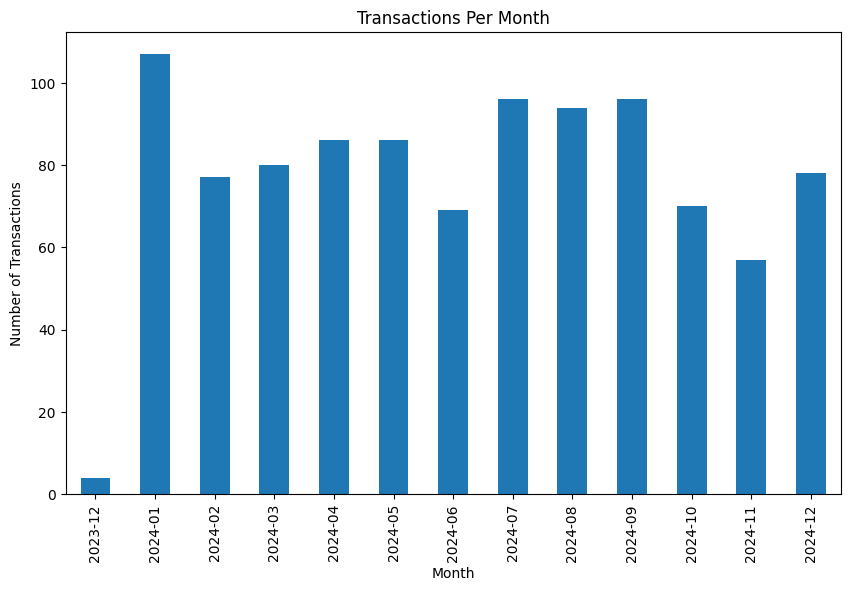

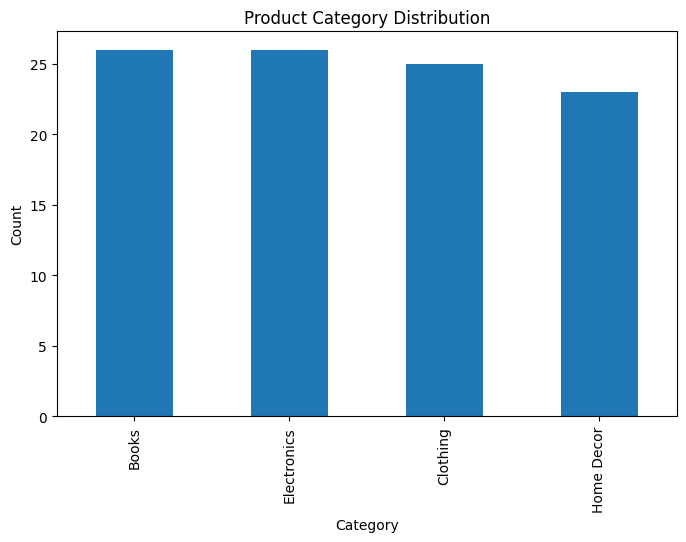

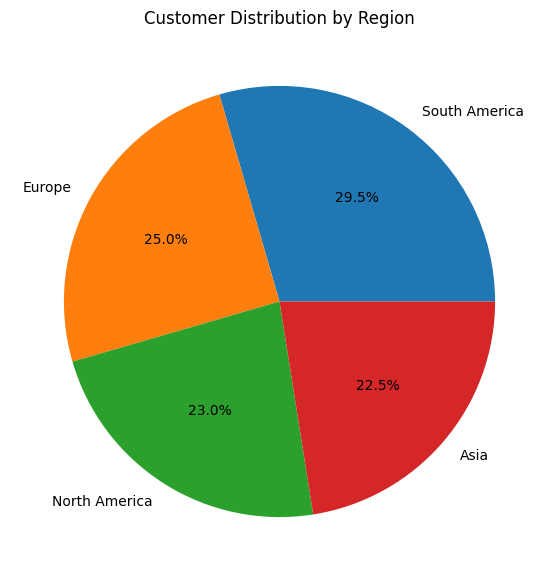

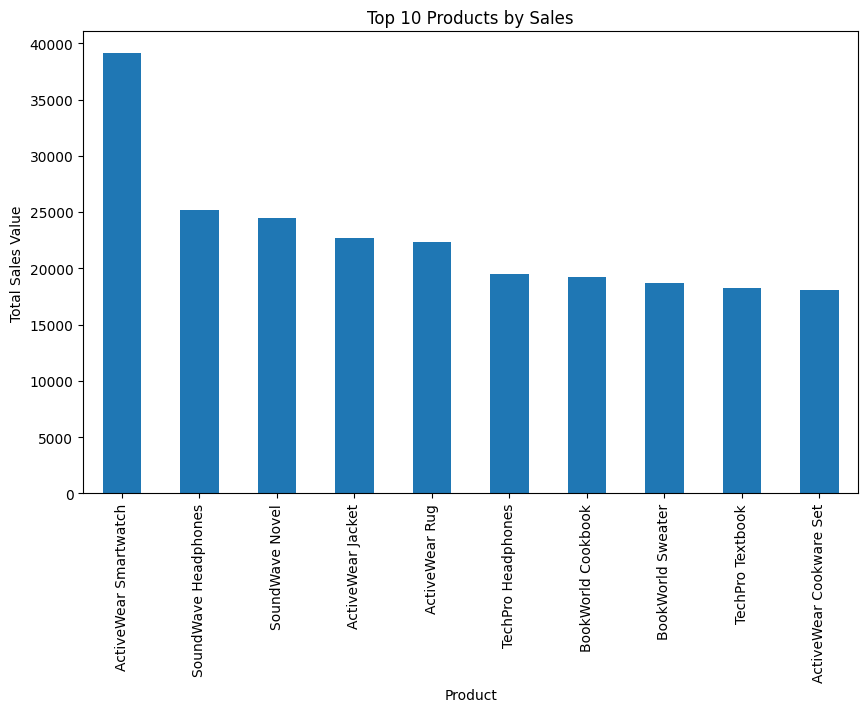

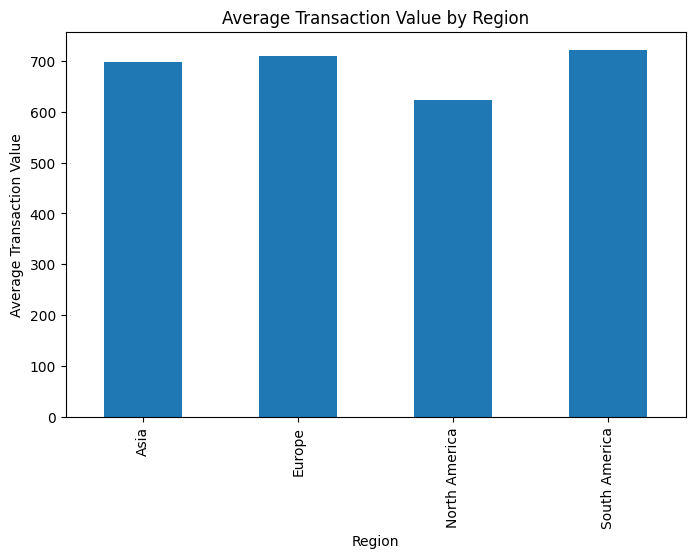

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
transactions_df = pd.read_csv('Transactions.csv')
products_df = pd.read_csv('Products.csv')
customers_df = pd.read_csv('Customers.csv')

# Basic structure and summary
print("Transactions Summary")
print(transactions_df.info())
print(transactions_df.describe())

print("Products Summary")
print(products_df.info())
print(products_df.describe())

print("Customers Summary")
print(customers_df.info())

# Checking for missing values
print("Missing Values in Transactions:")
print(transactions_df.isnull().sum())

print("Missing Values in Products:")
print(products_df.isnull().sum())

print("Missing Values in Customers:")
print(customers_df.isnull().sum())

# Unique counts
print("Unique Customers:", transactions_df['CustomerID'].nunique())
print("Unique Products:", transactions_df['ProductID'].nunique())

# Visualizations
# 1. Transactions over time
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['YearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')

transactions_per_month = transactions_df.groupby('YearMonth').size()
transactions_per_month.plot(kind='bar', figsize=(10, 6), title='Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# 2. Distribution of Product Categories
category_distribution = products_df['Category'].value_counts()
category_distribution.plot(kind='bar', figsize=(8, 5), title='Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 3. Region-wise Customer Distribution
region_distribution = customers_df['Region'].value_counts()
region_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), title='Customer Distribution by Region')
plt.ylabel('')
plt.show()

# 4. Top Products by Sales
transactions_products = pd.merge(transactions_df, products_df, on='ProductID')
product_sales = transactions_products.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
product_sales.plot(kind='bar', figsize=(10, 6), title='Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales Value')
plt.show()

# 5. Average Transaction Value by Region
transactions_customers = pd.merge(transactions_df, customers_df, on='CustomerID')
avg_transaction_value = transactions_customers.groupby('Region')['TotalValue'].mean()
avg_transaction_value.plot(kind='bar', figsize=(8, 5), title='Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value')
plt.show()
